In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0.0, 100.0, size=100)
X[:,1] = 0.75 * X[:,0] + 3.0 + np.random.normal(0, 10.0, size=100)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=1)

In [12]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_

array([[0.77167665, 0.63601506]])

In [14]:
X_reduction = pca.transform(X)

In [15]:
X_reduction.shape

(100, 1)

In [16]:
X_restore = pca.inverse_transform(X_reduction)

In [17]:
X_restore.shape

(100, 2)

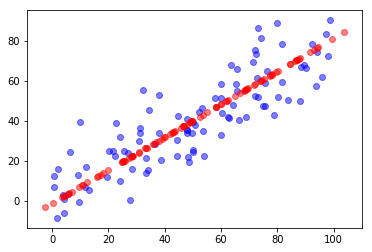

In [19]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)

In [20]:
from sklearn import datasets

In [24]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
X_train.shape

(1347, 64)

In [42]:
%%time
### 对原始样本进行训练，看看识别率
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 4.46 ms


In [37]:
knn_clf.score(X_test, y_test)

0.9911111111111112

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [45]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 1.98 ms


In [65]:
'''
原来64维度的数据被降维到了只有2维，虽然运行速度提高，但识别精度降低
'''
knn_clf.score(X_test_reduction, y_test)

0.9911111111111112

In [48]:
'''
解释的方差的比例，对于当前降维到2维的例子
0.14842173表示第一个轴能解释原数据的方差百分比
0.13717723表示第二个轴能解释原数据的方差百分比
对于当前连个维度来说涵盖了原始数据方差的0.14842173 + 0.13717723 ≈ 0.27，剩下的0.73信息都被丢失了
'''
pca.explained_variance_ratio_

array([0.14842173, 0.13717723])

In [49]:
pca= PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_
'''
对于每个主成分来说一次能解释的方差是多少
'''

array([1.48421726e-01, 1.37177233e-01, 1.16025891e-01, 8.11299985e-02,
       5.79363951e-02, 5.08066528e-02, 4.29027369e-02, 3.78304219e-02,
       3.43300798e-02, 3.09285301e-02, 2.37335573e-02, 2.21745759e-02,
       1.87095393e-02, 1.80208129e-02, 1.48024240e-02, 1.39310652e-02,
       1.35751401e-02, 1.23858854e-02, 1.04875791e-02, 9.23762728e-03,
       8.81377192e-03, 7.99768580e-03, 7.75521496e-03, 7.12533558e-03,
       6.88771382e-03, 5.98906197e-03, 5.78027031e-03, 5.20792668e-03,
       4.77576155e-03, 4.28948550e-03, 3.88505644e-03, 3.57043390e-03,
       3.47022568e-03, 3.24064630e-03, 3.14948250e-03, 2.87361683e-03,
       2.57119962e-03, 2.25819134e-03, 2.13176760e-03, 2.05398250e-03,
       1.84309801e-03, 1.59311249e-03, 1.50135588e-03, 1.41223885e-03,
       1.13892338e-03, 1.03487985e-03, 9.45524263e-04, 7.74320760e-04,
       5.07626143e-04, 4.42885357e-04, 2.22933932e-04, 7.76433796e-05,
       6.40231886e-05, 3.62520678e-05, 1.30339053e-05, 6.30832973e-06,
      

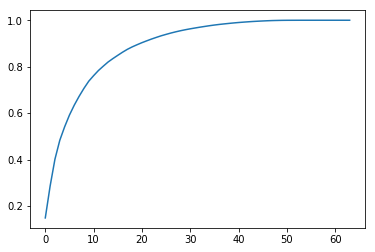

In [51]:
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i + 1]) for i in range(X_train.shape[1])])

In [53]:
'''
不知道要取多少个主成分，但是取的主成分个数能解释原来数据的0.95的方差
'''
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca.n_components_

28

In [62]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [63]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 3.47 ms


In [64]:
knn_clf.score(X_test_reduction, y_test)

0.9911111111111112

#### 但是用PCA降维到2维也有好处，就是能可视化

In [70]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_reduction = pca.transform(X)

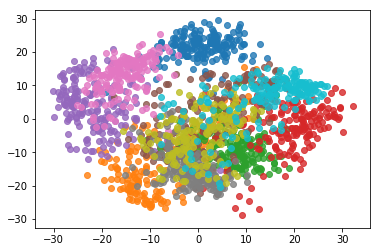

In [71]:
for i in range(10):
    plt.scatter(X_reduction[y == i, 0], X_reduction[y == i, 1], alpha=0.8)